In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\RGIPT\Documents\Classification\DATASET_ weka_679.csv")

In [3]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,630.0,1.50,0.0,0.25,0.0,0.0,80.0
1,1000.0,1.75,0.0,0.25,0.0,0.0,125.0
2,1500.0,2.50,0.0,0.25,0.0,0.0,175.0
3,1400.0,2.90,0.0,0.25,0.0,0.0,160.0
4,850.0,1.25,0.0,0.25,0.0,0.0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SSA(m2/g)             558 non-null    float64
 1   Pore size(nm)         558 non-null    float64
 2   Pore Volume (cm3/g)   558 non-null    float64
 3   Potential             558 non-null    float64
 4   Nitrogen %            558 non-null    float64
 5   Id/Ig                 558 non-null    float64
 6   Specific Capacitance  558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [5]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [6]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [8]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [9]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

SSA          441
PS           177
PV           223
Potential     21
NC           129
Id/Ig        113
SC           330
dtype: int64

In [10]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


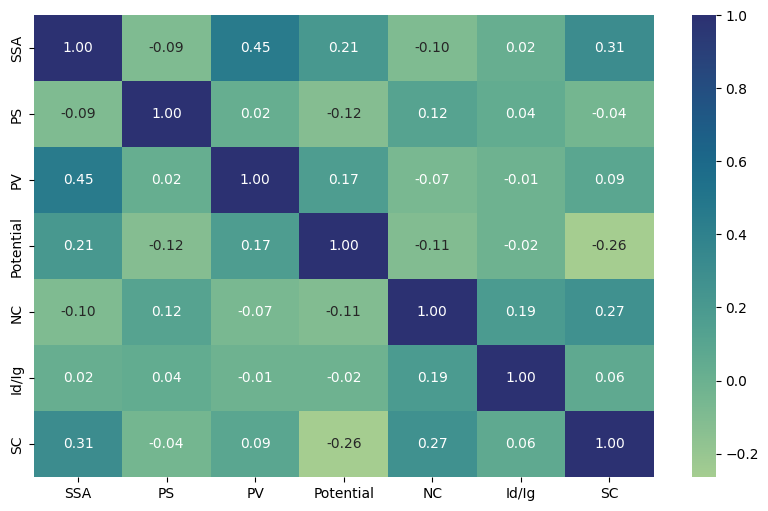

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
def assign_class(value):
    if value <= 138:
        return 1
    elif value <= 223:
        return 2
    else:
        return 3

df['Output_Class'] = df['SC'].apply(assign_class)
# Check the distribution of output classes
print("\nClass Distribution:")
print(df['Output_Class'].value_counts())


Class Distribution:
Output_Class
1    187
2    186
3    185
Name: count, dtype: int64


In [13]:
# split the data as df1,df2 and df3
df1 = df[df['Output_Class'] == 1]
df2 = df[df['Output_Class'] == 2]
df3 = df[df['Output_Class'] == 3]

In [14]:
#drop specific capacitance column for classification
# Drop column ''
dfop = df.drop(columns=['SC'])
#dfop = df.drop(columns=[df.columns[6]], inplace=True)
dfop.head()

,SSA,PS,PV,Potential,NC,Id/Ig,Output_Class
0,0.63,1.50,0.0,0.25,0.0,0.0,1
1,1.00,1.75,0.0,0.25,0.0,0.0,1
2,1.50,2.50,0.0,0.25,0.0,0.0,2
3,1.40,2.90,0.0,0.25,0.0,0.0,2
4,0.85,1.25,0.0,0.25,0.0,0.0,1


In [15]:
# Check Unique Values for each variable.
for i in dfop.columns:
  print(f"Unique {i}'s count:{dfop[i].nunique()}\n------------------------------------------")
  if i in dfop.columns:
    if(dfop[i].nunique() < 12):
      print(f"\n{dfop[i].unique()}\n------------------------------------------")
     

Unique SSA's count:441
------------------------------------------
Unique PS's count:177
------------------------------------------
Unique PV's count:223
------------------------------------------
Unique Potential's count:21
------------------------------------------
Unique NC's count:129
------------------------------------------
Unique Id/Ig's count:113
------------------------------------------
Unique Output_Class's count:3
------------------------------------------

[1 2 3]
------------------------------------------


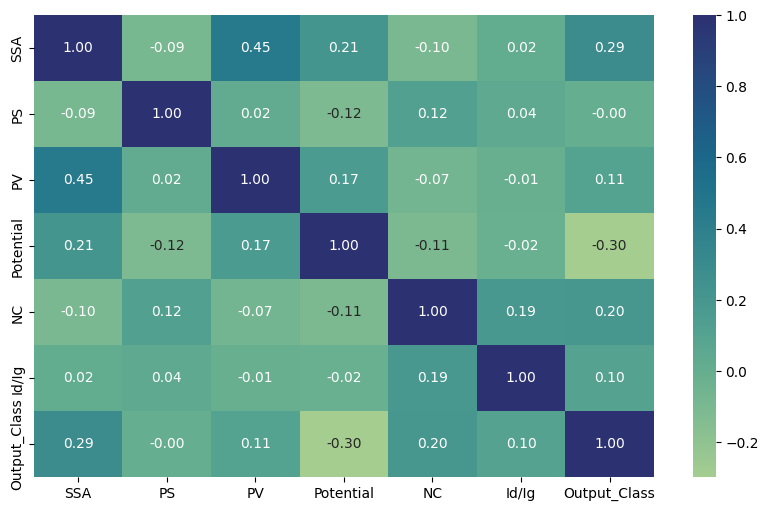

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfop.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
import os
print(os.getcwd())  # Shows the current working directory



C:\Users\RGIPT\Documents\Classification


In [18]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score 

In [19]:
# To select all columns except the last one for X1, and the last column for y1 for  regression analysis of classes:
Xop = dfop.iloc[:, :-1]  # Select all columns except the last one for features (X1)
yop = dfop.iloc[:, -1]   # Select the last column as the target (y1)

In [20]:
Xop.head()

,SSA,PS,PV,Potential,NC,Id/Ig
0,0.63,1.50,0.0,0.25,0.0,0.0
1,1.00,1.75,0.0,0.25,0.0,0.0
2,1.50,2.50,0.0,0.25,0.0,0.0
3,1.40,2.90,0.0,0.25,0.0,0.0
4,0.85,1.25,0.0,0.25,0.0,0.0


In [21]:
yop.head()

0    1
1    1
2    2
3    2
4    1
Name: Output_Class, dtype: int64

In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xop, yop, test_size=0.2, random_state=42)

In [23]:
#Scaler technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainc_scaler = scaler.fit_transform(X_trainc)
X_testc_scaler = scaler.transform(X_testc)

In [24]:
#Importing different classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
# Define scoring method
scoring = 'accuracy'
# Model building to train
names = ['K Nearest Neighbors', 'Gaussian Process', 'Random Forest', 'Neural Net', 'AddaBoost', 'GradientBoost', 'Naive Bayes']
Classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    #DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
    MLPClassifier(alpha = 1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    
    
    ]


In [27]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_trainc, y_trainc)
    y_predc = model.predict(X_testc)
    print(name)
    #print(f"R2 Score (R21): {r2_score(y_testc, y_predc)}")
    print(f"Mean Absolute error (MAE1): {mean_absolute_error(y_testc, y_predc)}")
    #print(f"Mean Squared Error (MSE1): {mean_squared_error(y_testc, y_predc)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_testc, y_predc))}")
    # Calculate Cohen's Kappa
    print(f"Cohen's Kappa Score: {cohen_kappa_score(y_testc, y_predc)}")

K Nearest Neighbors
Mean Absolute error (MAE1): 0.6428571428571429
Root Mean Squared Error (RMSE): 0.9543135154205277
Cohen's Kappa Score: 0.2427046263345195


C:\Users\RGIPT\AppData\Roaming\Python\Python312\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process
Mean Absolute error (MAE1): 0.5357142857142857
Root Mean Squared Error (RMSE): 0.8556534679079242
Cohen's Kappa Score: 0.3556416578607491
Random Forest
Mean Absolute error (MAE1): 0.49107142857142855
Root Mean Squared Error (RMSE): 0.7849021777084254
Cohen's Kappa Score: 0.36295769640952713


C:\Users\RGIPT\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net
Mean Absolute error (MAE1): 0.49107142857142855
Root Mean Squared Error (RMSE): 0.773443136703847
Cohen's Kappa Score: 0.3512235488828468
AddaBoost
Mean Absolute error (MAE1): 0.49107142857142855
Root Mean Squared Error (RMSE): 0.7618117502750551
Cohen's Kappa Score: 0.32603201347935973
GradientBoost
Mean Absolute error (MAE1): 0.42857142857142855
Root Mean Squared Error (RMSE): 0.6813851438692469
Cohen's Kappa Score: 0.3842476395362734
Naive Bayes
Mean Absolute error (MAE1): 0.6160714285714286
Root Mean Squared Error (RMSE): 0.9306295871996703
Cohen's Kappa Score: 0.2779275583167272


In [28]:
#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_trainc_scaler, y_trainc)
    y_predc = model.predict(X_testc_scaler)
    print(name)
    #print(accuracy_score(y_testc, y_predc))
    print(f"Clasification report: {classification_report(y_testc, y_predc)}")
    

K Nearest Neighbors
Clasification report:               precision    recall  f1-score   support

           1       0.50      0.62      0.55        34
           2       0.52      0.35      0.42        43
           3       0.59      0.69      0.63        35

    accuracy                           0.54       112
   macro avg       0.53      0.55      0.53       112
weighted avg       0.53      0.54      0.53       112

Gaussian Process
Clasification report:               precision    recall  f1-score   support

           1       0.56      0.71      0.62        34
           2       0.52      0.40      0.45        43
           3       0.69      0.71      0.70        35

    accuracy                           0.59       112
   macro avg       0.59      0.61      0.59       112
weighted avg       0.58      0.59      0.58       112

Random Forest
Clasification report:               precision    recall  f1-score   support

           1       0.57      0.74      0.64        34
           2

C:\Users\RGIPT\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net
Clasification report:               precision    recall  f1-score   support

           1       0.55      0.71      0.62        34
           2       0.48      0.33      0.39        43
           3       0.62      0.69      0.65        35

    accuracy                           0.55       112
   macro avg       0.55      0.57      0.55       112
weighted avg       0.54      0.55      0.54       112

AddaBoost
Clasification report:               precision    recall  f1-score   support

           1       0.57      0.62      0.59        34
           2       0.48      0.49      0.48        43
           3       0.65      0.57      0.61        35

    accuracy                           0.55       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.56      0.55      0.55       112

GradientBoost
Clasification report:               precision    recall  f1-score   support

           1       0.62      0.71      0.66        34
           2       0.49     

In [29]:
#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_trainc, y_trainc)
    y_predc = model.predict(X_testc)
    print(name)
    #print(accuracy_score(y_testc, y_predc))
    print(f"Clasification report: {classification_report(y_testc, y_predc)}")
    

K Nearest Neighbors
Clasification report:               precision    recall  f1-score   support

           1       0.45      0.50      0.47        34
           2       0.52      0.35      0.42        43
           3       0.51      0.66      0.57        35

    accuracy                           0.49       112
   macro avg       0.49      0.50      0.49       112
weighted avg       0.49      0.49      0.48       112



C:\Users\RGIPT\AppData\Roaming\Python\Python312\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process
Clasification report:               precision    recall  f1-score   support

           1       0.51      0.68      0.58        34
           2       0.63      0.28      0.39        43
           3       0.58      0.80      0.67        35

    accuracy                           0.56       112
   macro avg       0.58      0.59      0.55       112
weighted avg       0.58      0.56      0.54       112

Random Forest
Clasification report:               precision    recall  f1-score   support

           1       0.52      0.68      0.59        34
           2       0.55      0.42      0.47        43
           3       0.69      0.69      0.69        35

    accuracy                           0.58       112
   macro avg       0.58      0.59      0.58       112
weighted avg       0.58      0.58      0.58       112



C:\Users\RGIPT\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net
Clasification report:               precision    recall  f1-score   support

           1       0.56      0.71      0.62        34
           2       0.45      0.33      0.38        43
           3       0.61      0.66      0.63        35

    accuracy                           0.54       112
   macro avg       0.54      0.56      0.54       112
weighted avg       0.53      0.54      0.53       112

AddaBoost
Clasification report:               precision    recall  f1-score   support

           1       0.57      0.62      0.59        34
           2       0.48      0.49      0.48        43
           3       0.65      0.57      0.61        35

    accuracy                           0.55       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.56      0.55      0.55       112

GradientBoost
Clasification report:               precision    recall  f1-score   support

           1       0.62      0.71      0.66        34
           2       0.49     

In [31]:
## SVM Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import svm
svm_classifier = svm.SVC(kernel = 'rbf')
model.fit(X_trainc_scaler, y_trainc)
y_predc = model.predict(X_testc_scaler)
print(f"Clasification report: {classification_report(y_testc, y_predc)}")

Clasification report:               precision    recall  f1-score   support

           1       0.51      0.53      0.52        34
           2       0.56      0.21      0.31        43
           3       0.49      0.86      0.62        35

    accuracy                           0.51       112
   macro avg       0.52      0.53      0.48       112
weighted avg       0.53      0.51      0.47       112



In [33]:
# Define scoring method

names = ['SVM RBF']
Classifiers = [
    svm.SVC(kernel = 'rbf')
    
    ]

#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_trainc_scaler, y_trainc)
    y_predc = model.predict(X_testc_scaler)
    print(name)
    #print(accuracy_score(y_test, y_pred))
    print(classification_report(y_testc, y_predc))

SVM RBF
              precision    recall  f1-score   support

           1       0.54      0.79      0.64        34
           2       0.57      0.37      0.45        43
           3       0.71      0.69      0.70        35

    accuracy                           0.60       112
   macro avg       0.61      0.62      0.60       112
weighted avg       0.60      0.60      0.59       112



In [34]:
# Define scoring method

names = ['Decision Tree']
Classifiers = [
    DecisionTreeClassifier(max_depth = 5),
    
    ]

#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_trainc_scaler, y_trainc)
    y_predc = model.predict(X_testc_scaler)
    print(name)
    #print(accuracy_score(y_test, y_pred))
    print(classification_report(y_testc, y_predc))

Decision Tree
              precision    recall  f1-score   support

           1       0.47      0.74      0.57        34
           2       0.57      0.28      0.38        43
           3       0.63      0.69      0.66        35

    accuracy                           0.54       112
   macro avg       0.56      0.57      0.54       112
weighted avg       0.56      0.54      0.52       112

